In [1]:
#Configurazione 2: RIMPIAZZANDO WheelType nulli con la moda calcolata con groupby
%matplotlib inline   
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#RIMPIAZZANDO I PREZZI
df = pd.read_csv('training.csv') 

#REPLACE MISSING VALUES & OUTLIERS in un colpo solo...
#Rimpiazzo gli 0 e 1 dei valori di MMR con np.nan e poi rimpiazzo con la media fatta rispetto a, dapprima Make, Model e SubModel
#(di cui se ne trovano la maggior parte), poi Make e Model, e poi Make per i pochi rimasti
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].replace(0, np.nan)
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].replace(1, np.nan)

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].replace(0, np.nan)
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].replace(1, np.nan)

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].replace(0, np.nan)
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].replace(1, np.nan)

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].replace(0, np.nan)
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].replace(1, np.nan)

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].replace(0, np.nan)
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].replace(1, np.nan)

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].replace(0, np.nan)
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].replace(1, np.nan)

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].replace(0, np.nan)
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].replace(1, np.nan)

df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].replace(0, np.nan)
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].replace(1, np.nan)

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

#Sostituzione missing values colonna TopThreeAmericanName
df.loc[15769,'TopThreeAmericanName']='GM' 
df.loc[18532,'TopThreeAmericanName']='CHRYSLER'
df.loc[20016,'TopThreeAmericanName']='CHRYSLER'
df.loc[35157,'TopThreeAmericanName']='CHRYSLER'

#Rimpiazzo i valori nulli di Nationality con AMERICAN perche' i 4 che mancavano di TopThreeAmericanName erano tutti americani
df['Nationality'] = df['Nationality'].fillna('AMERICAN')

#IMPORTANTE: Siccome le righe con valori nulli di Color e SubModel sono gli stessi (e sono solo 7) li togliamo:
df=df.dropna(subset=['SubModel', 'Color']) 

#Rimpiazzati i missing values di Transmission (con la moda fra le macchine dello stesso modello (e stesso Make))
df['Transmission'] = df['Transmission'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mode()[0])) #faccio la moda perche' sono 'Transimission' stringhe

#Convertito la colonna Trim a stringa (c'erano dei valori interi che impedivano di calcolare la moda)
df['Trim']=df['Trim'].astype(str) 
df['Trim'] = df['Trim'].replace('nan', np.nan)
#Rimpiazzato i missing values della colonna Trim con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
df['Trim'] = df.groupby(['Make','Model', 'SubModel']).Trim.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['Trim'] = df.groupby(['Make','Model']).Trim.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['Trim'] = df.groupby('Make').Trim.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)

#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make Model (molto precisa)
df['WheelType']=df['WheelType'].astype(str) 
df['WheelType'] = df['WheelType'].replace('nan', np.nan)
#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
df['WheelType'] = df.groupby(['Make','Model','SubModel']).WheelType.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['WheelType'] = df.groupby(['Make','Size']).WheelType.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['WheelType'] = df.groupby('Make').WheelType.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)


#eliminiamo Primeunit e AUCGUART perche' mancano 55703 valori
df = df.drop(['PRIMEUNIT', 'AUCGUART'], axis=1)

#eliminiamo BYRNO, RefId, VNZIP1 e WheelTypeID perche' non forniscono informazione
df = df.drop(['BYRNO', 'RefId','WheelTypeID'], axis=1)

#Togliamo le righe che hanno Size o Trim np.nan (4 di Size e 1 di Trim)
df=df.dropna(subset=['Size','Trim','WheelType'])

#Outlier: c'e' un valore di VehBCost uguale a 1. Lo trattiamo come un outlier sostituendolo con la media fatta raggruppando su Make e Model
df['VehBCost'] = df['VehBCost'].replace(1, np.nan)
df['VehBCost'] = df['VehBCost'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df=df[df['VehicleAge']>0] #Tolgo una riga con VehicleAge=0 sennò non posso calcolare MilesPerYear
#Aggiunta di una nuova colonna
df['MilesPerYear'] = df['VehOdo'] / df['VehicleAge']
#------------------------------------------- CLASSIFICATION -------------------------------------------------------------

#eliminazione classe da predire
classes = df['IsBadBuy'] 

#df['Month'] = df['PurchDate'][1]

#sostituzione attributi non numerici con attributi numerici, e cancellazione delle colonne non utili per il cluster
#del df['PurchDate']
#del df['SubModel'] #son troppi
#del df['Model']
#del df['TopThreeAmericanName']
#del df['VNST']
#del df['Color']
#del df['Trim']
#del df['WheelType']
#del df['IsOnlineSale']
#del df['VehYear']
df['AcquisitionAveragePrice']=(df['MMRAcquisitionAuctionAveragePrice']+df['MMRAcquisitionAuctionCleanPrice']+df['MMRAcquisitionRetailAveragePrice']+df['MMRAcquisitonRetailCleanPrice'])/4.0
df['CurrentAveragePrice']=(df['MMRCurrentAuctionAveragePrice']+df['MMRCurrentAuctionCleanPrice']+df['MMRCurrentRetailAveragePrice']+df['MMRCurrentRetailCleanPrice'])/4.0
#del df['MMRAcquisitionAuctionAveragePrice']
#del df['MMRAcquisitionAuctionCleanPrice'] 
#del df['MMRAcquisitionRetailAveragePrice']
#del df['MMRAcquisitonRetailCleanPrice']
#del df['MMRCurrentAuctionAveragePrice']
#del df['MMRCurrentAuctionCleanPrice']
#del df['MMRCurrentRetailAveragePrice']
#del df['MMRCurrentRetailCleanPrice']
#del df['Make']

dt = pd.read_csv('test.csv') 

#REPLACE MISSING VALUES & OUTLIERS in un colpo solo...
#Rimpiazzo gli 0 e 1 dei valori di MMR con np.nan e poi rimpiazzo con la media fatta rispetto a, dapprima Make, Model e SubModel
#(di cui se ne trovano la maggior parte), poi Make e Model, e poi Make per i pochi rimasti
dt['MMRAcquisitionAuctionAveragePrice'] = dt['MMRAcquisitionAuctionAveragePrice'].replace(0, np.nan)
dt['MMRAcquisitionAuctionAveragePrice'] = dt['MMRAcquisitionAuctionAveragePrice'].replace(1, np.nan)

dt['MMRAcquisitionAuctionAveragePrice'] = dt['MMRAcquisitionAuctionAveragePrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRAcquisitionAuctionCleanPrice'] = dt['MMRAcquisitionAuctionCleanPrice'].replace(0, np.nan)
dt['MMRAcquisitionAuctionCleanPrice'] = dt['MMRAcquisitionAuctionCleanPrice'].replace(1, np.nan)

dt['MMRAcquisitionAuctionCleanPrice'] = dt['MMRAcquisitionAuctionCleanPrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRAcquisitionRetailAveragePrice'] = dt['MMRAcquisitionRetailAveragePrice'].replace(0, np.nan)
dt['MMRAcquisitionRetailAveragePrice'] = dt['MMRAcquisitionRetailAveragePrice'].replace(1, np.nan)

dt['MMRAcquisitionRetailAveragePrice'] = dt['MMRAcquisitionRetailAveragePrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRAcquisitonRetailCleanPrice'] = dt['MMRAcquisitonRetailCleanPrice'].replace(0, np.nan)
dt['MMRAcquisitonRetailCleanPrice'] = dt['MMRAcquisitonRetailCleanPrice'].replace(1, np.nan)

dt['MMRAcquisitonRetailCleanPrice'] = dt['MMRAcquisitonRetailCleanPrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRCurrentAuctionAveragePrice'] = dt['MMRCurrentAuctionAveragePrice'].replace(0, np.nan)
dt['MMRCurrentAuctionAveragePrice'] = dt['MMRCurrentAuctionAveragePrice'].replace(1, np.nan)

dt['MMRCurrentAuctionAveragePrice'] = dt['MMRCurrentAuctionAveragePrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRCurrentAuctionCleanPrice'] = dt['MMRCurrentAuctionCleanPrice'].replace(0, np.nan)
dt['MMRCurrentAuctionCleanPrice'] = dt['MMRCurrentAuctionCleanPrice'].replace(1, np.nan)

dt['MMRCurrentAuctionCleanPrice'] = dt['MMRCurrentAuctionCleanPrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRCurrentRetailAveragePrice'] = dt['MMRCurrentRetailAveragePrice'].replace(0, np.nan)
dt['MMRCurrentRetailAveragePrice'] = dt['MMRCurrentRetailAveragePrice'].replace(1, np.nan)

dt['MMRCurrentRetailAveragePrice'] = dt['MMRCurrentRetailAveragePrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRCurrentRetailCleanPrice'] = dt['MMRCurrentRetailCleanPrice'].replace(0, np.nan)
dt['MMRCurrentRetailCleanPrice'] = dt['MMRCurrentRetailCleanPrice'].replace(1, np.nan)

dt['MMRCurrentRetailCleanPrice'] = dt['MMRCurrentRetailCleanPrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------

dt['MMRAcquisitionAuctionAveragePrice'] = dt['MMRAcquisitionAuctionAveragePrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitionAuctionCleanPrice'] = dt['MMRAcquisitionAuctionCleanPrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitionRetailAveragePrice'] = dt['MMRAcquisitionRetailAveragePrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitonRetailCleanPrice'] = dt['MMRAcquisitonRetailCleanPrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentAuctionAveragePrice'] = dt['MMRCurrentAuctionAveragePrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentAuctionCleanPrice'] = dt['MMRCurrentAuctionCleanPrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentRetailCleanPrice'] = dt['MMRCurrentRetailCleanPrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentRetailAveragePrice'] = dt['MMRCurrentRetailAveragePrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitionAuctionAveragePrice'] = dt['MMRAcquisitionAuctionAveragePrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitionAuctionCleanPrice'] = dt['MMRAcquisitionAuctionCleanPrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitionRetailAveragePrice'] = dt['MMRAcquisitionRetailAveragePrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitonRetailCleanPrice'] = dt['MMRAcquisitonRetailCleanPrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentAuctionAveragePrice'] = dt['MMRCurrentAuctionAveragePrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentAuctionCleanPrice'] = dt['MMRCurrentAuctionCleanPrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))#

dt['MMRCurrentRetailCleanPrice'] = dt['MMRCurrentRetailCleanPrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

#IMPORTANTE: Togliamo la riga con tutti i problemi
dt=dt.dropna(subset=['SubModel']) 

#Convertito la colonna Trim a stringa (c'erano dei valori interi che impedivano di calcolare la moda)
dt['Trim']=dt['Trim'].astype(str) 
#Rimpiazzato i missing values della colonna Trim con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
dt['Trim'] = dt.groupby(['Make','Model', 'SubModel']).Trim.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
dt['Trim'] = dt.groupby(['Make','Model']).Trim.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
dt['Trim'] = dt.groupby('Make').Trim.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)

#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make Model (molto precisa)
dt['WheelType']=dt['WheelType'].astype(str) 
dt['WheelType'] = dt['WheelType'].replace('nan', np.nan)
#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
df['WheelType'] = df.groupby(['Make','Model','SubModel']).WheelType.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['WheelType'] = df.groupby(['Make','Size']).WheelType.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['WheelType'] = df.groupby('Make').WheelType.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)

#eliminiamo Primeunit e AUCGUART perche' mancano 55703 valori
dt = dt.drop(['PRIMEUNIT', 'AUCGUART'], axis=1)

#eliminiamo BYRNO, RefId, VNZIP1 e WheelTypeID perche' non forniscono informazione
dt = dt.drop(['BYRNO', 'RefId','WheelTypeID'], axis=1)

#Togliamo le righe che hanno Size o Trim np.nan (4 di Size e 1 di Trim)
dt=dt.dropna(subset=['Size','Trim','WheelType'])

#Outlier: c'e' un valore di VehBCost uguale a 1. Lo trattiamo come un outlier sostituendolo con la media fatta raggruppando su Make e Model
dt['VehBCost'] = dt['VehBCost'].replace(1, np.nan)
dt['VehBCost'] = dt['VehBCost'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))


dt=dt[dt['VehicleAge']>0] #Tolgo una riga con VehicleAge=0 sennò non posso calcolare MilesPerYear
#Aggiunta di una nuova colonna
#Aggiunta di una nuova colonna
dt['MilesPerYear'] = dt['VehOdo'] / dt['VehicleAge']


#dt.describe()
#dt.isnull().sum()

#------------------------------------------- CLASSIFICATION -------------------------------------------------------------

#eliminazione classe da predire
classes = dt['IsBadBuy'] 


#sostituzione attributi non numerici con attributi numerici, e cancellazione delle colonne non utili per il cluster
#del dt['PurchDate']
#del dt['SubModel'] #son troppi
#del dt['Model']
#del dt['TopThreeAmericanName']
#del dt['VNST']
#del dt['Color']
#del dt['Trim']
#del dt['WheelType']
#del dt['IsOnlineSale']
#del dt['VehYear']
                                                    #MEDIE PREZZI
dt['AcquisitionAveragePrice']=(dt['MMRAcquisitionAuctionAveragePrice']+dt['MMRAcquisitionAuctionCleanPrice']+dt['MMRAcquisitionRetailAveragePrice']+dt['MMRAcquisitonRetailCleanPrice'])/4.0
dt['CurrentAveragePrice']=(dt['MMRCurrentAuctionAveragePrice']+dt['MMRCurrentAuctionCleanPrice']+dt['MMRCurrentRetailAveragePrice']+dt['MMRCurrentRetailCleanPrice'])/4.0
#del dt['MMRAcquisitionAuctionAveragePrice']
#del dt['MMRAcquisitionAuctionCleanPrice'] 
#del dt['MMRAcquisitionRetailAveragePrice']
#del dt['MMRAcquisitonRetailCleanPrice']
#del dt['MMRCurrentAuctionAveragePrice']
#del dt['MMRCurrentAuctionCleanPrice']
#del dt['MMRCurrentRetailAveragePrice']
#del dt['MMRCurrentRetailCleanPrice']
#del dt['Make']

In [2]:
import datetime   #Aggiungiamo colonna mese e cancelliamo data (così rimangono Year e Month)
df['data']=pd.to_datetime(df.PurchDate)
df['Month']=df.data.dt.month
df['Day']=df.data.dt.day
del df['data']
del df['PurchDate']
#----------------------------------------------------TEST----------------------------------------------------------------------

dt['data']=pd.to_datetime(dt.PurchDate)
dt['Month']=dt.data.dt.month
dt['Day']=dt.data.dt.day
del dt['data']
del dt['PurchDate']

#Nuovi attributi numerici con differenze tra Current e Acquisition


df['DiffAuctionAverage']=df['MMRCurrentAuctionAveragePrice']-df['MMRAcquisitionAuctionAveragePrice']
df['DiffAuctionClean']=df['MMRCurrentAuctionCleanPrice']-df['MMRAcquisitionAuctionCleanPrice']
df['DiffRetailAverage']=df['MMRCurrentRetailAveragePrice']-df['MMRAcquisitionRetailAveragePrice']
df['DiffRetailClean']=df['MMRCurrentRetailCleanPrice']-df['MMRAcquisitonRetailCleanPrice']
df['DiffVehBCURRENTAuctionAverage']=df['VehBCost']-df['MMRCurrentAuctionAveragePrice']
df['DiffVehBCURRENTAuctionClean']=df['VehBCost']-df['MMRCurrentAuctionCleanPrice']
df['DiffVehBCURRENTRetailAverage']=df['VehBCost']-df['MMRCurrentRetailAveragePrice']
df['DiffVehBCURRENTRetailClean']=df['VehBCost']-df['MMRCurrentRetailCleanPrice']

#Nuovi attributi numerici con differenze tra VehBCost e Acquisition
df['DiffVehBACQUISITIONAuctionAverage']=df['VehBCost']-df['MMRAcquisitionAuctionAveragePrice']
df['DiffVehBACQUISITIONAuctionClean']=df['VehBCost']-df['MMRAcquisitionAuctionCleanPrice']
df['DiffVehBACQUISITIONRetailAverage']=df['VehBCost']-df['MMRAcquisitionRetailAveragePrice']
df['DiffVehBACQUISITIONRetailClean']=df['VehBCost']-df['MMRAcquisitonRetailCleanPrice']


#----------------------------------------------------TEST----------------------------------------------------------------------
#Nuovi attributi numerici con differenze tra Current e Acquisition
dt['DiffAuctionAverage']=dt['MMRCurrentAuctionAveragePrice']-dt['MMRAcquisitionAuctionAveragePrice']
dt['DiffAuctionClean']=dt['MMRCurrentAuctionCleanPrice']-dt['MMRAcquisitionAuctionCleanPrice']
dt['DiffRetailAverage']=dt['MMRCurrentRetailAveragePrice']-dt['MMRAcquisitionRetailAveragePrice']
dt['DiffRetailClean']=dt['MMRCurrentRetailCleanPrice']-dt['MMRAcquisitonRetailCleanPrice']
dt['DiffVehBCURRENTAuctionAverage']=dt['VehBCost']-dt['MMRCurrentAuctionAveragePrice']
dt['DiffVehBCURRENTAuctionClean']=dt['VehBCost']-dt['MMRCurrentAuctionCleanPrice']
dt['DiffVehBCURRENTRetailAverage']=dt['VehBCost']-dt['MMRCurrentRetailAveragePrice']
dt['DiffVehBCURRENTRetailClean']=dt['VehBCost']-dt['MMRCurrentRetailCleanPrice']



#Nuovi attributi numerici con differenze tra VehBCost e Acquisition
dt['DiffVehBACQUISITIONAuctionAverage']=dt['VehBCost']-dt['MMRAcquisitionAuctionAveragePrice']
dt['DiffVehBACQUISITIONAuctionClean']=dt['VehBCost']-dt['MMRAcquisitionAuctionCleanPrice']
dt['DiffVehBACQUISITIONRetailAverage']=dt['VehBCost']-dt['MMRAcquisitionRetailAveragePrice']
dt['DiffVehBACQUISITIONRetailClean']=dt['VehBCost']-dt['MMRAcquisitonRetailCleanPrice']

In [3]:
#OVERSAMPLING
# Class count
count_class_0, count_class_1 = df.IsBadBuy.value_counts()

# Divide by class
df_class_0 = df[df['IsBadBuy'] == 0]
df_class_1 = df[df['IsBadBuy'] == 1]

Random over-sampling:
0    51166
1    25000
Name: IsBadBuy, dtype: int64


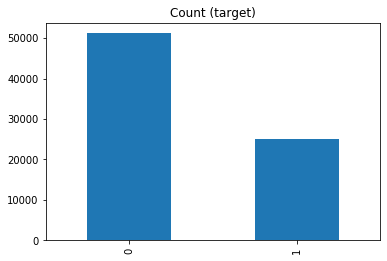

In [4]:
df_class_1_over = df_class_1.sample(25000, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.IsBadBuy.value_counts())

df_test_over.IsBadBuy.value_counts().plot(kind='bar', title='Count (target)');

frames=[df_class_1_over,df_class_0]
dftraining=pd.concat(frames)

In [5]:
from sklearn.preprocessing import OneHotEncoder
le =LabelEncoder()
df['IsBadBuy'] = le.fit_transform(df['IsBadBuy'])
df['IsOnlineSale']=le.fit_transform(df['IsOnlineSale'])
df['Auction'] = le.fit_transform(df['Auction'])
df['Make'] = le.fit_transform(df['Make'])
df['Model'] = le.fit_transform(df['Model'])
df['Trim'] = le.fit_transform(df['Trim'])
df['SubModel'] = le.fit_transform(df['SubModel'])
df['Color'] = le.fit_transform(df['Color'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df['WheelType'] = le.fit_transform(df['WheelType'])
df['Nationality'] = le.fit_transform(df['Nationality'])
df['Size'] = le.fit_transform(df['Size'])
df['TopThreeAmericanName'] = le.fit_transform(df['TopThreeAmericanName'])
df['VNST'] = le.fit_transform(df['VNST'])
df['VNZIP1']=le.fit_transform(df['VNZIP1'])

#----------------------------------------------------TEST----------------------------------------------------------------------


dt['IsBadBuy'] = le.fit_transform(dt['IsBadBuy'])
dt['IsOnlineSale']=le.fit_transform(dt['IsOnlineSale'])
dt['Auction'] = le.fit_transform(dt['Auction'])
dt['Make'] = le.fit_transform(dt['Make'])
dt['Model'] = le.fit_transform(dt['Model'])
dt['Trim'] = le.fit_transform(dt['Trim'])
dt['SubModel'] = le.fit_transform(dt['SubModel'])
dt['Color'] = le.fit_transform(dt['Color'])
dt['Transmission'] = le.fit_transform(dt['Transmission'])
dt['WheelType'] = le.fit_transform(dt['WheelType'])
dt['Nationality'] = le.fit_transform(dt['Nationality'])
dt['Size'] = le.fit_transform(dt['Size'])
dt['TopThreeAmericanName'] = le.fit_transform(dt['TopThreeAmericanName'])
dt['VNST'] = le.fit_transform(dt['VNST'])
dt['VNZIP1']=le.fit_transform(dt['VNZIP1'])

In [6]:
attributes = [col for col in df.columns if col != 'IsBadBuy']
X_train = df[attributes].values
y_train=df['IsBadBuy']

X_test = dt[attributes].values
y_test = dt['IsBadBuy']

In [7]:
#1)Cerco i migliori pesi con min_sample_split e min_sample_leaf fissati ad un valore arbitrario

In [8]:
#i e' il peso dato a IsBadBuy = 0
#j e' il peso dato a IsBadBuy = 1

for i in range(10,150,2):
    clf = DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=210, min_samples_leaf=100, class_weight = {0:1, 1:i/10})
    clf.fit(X_train, y_train)
    X=X_train
    y=y_train
    y_pred = clf.predict(X_train)
    print('i = ', i)
    print(classification_report(y_train, y_pred))
    y_pred = clf.predict(X_test)
    print('----------------------------------------')
    print(classification_report(y_test, y_pred))
    print('=========================================')

i =  10
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     51166
           1       0.69      0.11      0.20      7207

    accuracy                           0.88     58373
   macro avg       0.79      0.55      0.57     58373
weighted avg       0.86      0.88      0.85     58373

----------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     12638
           1       0.34      0.03      0.06      1360

    accuracy                           0.90     13998
   macro avg       0.62      0.51      0.50     13998
weighted avg       0.85      0.90      0.86     13998

i =  12
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     51166
           1       0.65      0.13      0.22      7207

    accuracy                           0.88     58373
   macro avg       0.77      0.56      0.58     58373
weighted avg     

i =  32
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     51166
           1       0.36      0.43      0.39      7207

    accuracy                           0.84     58373
   macro avg       0.64      0.66      0.65     58373
weighted avg       0.85      0.84      0.84     58373

----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     12638
           1       0.18      0.25      0.21      1360

    accuracy                           0.82     13998
   macro avg       0.55      0.56      0.55     13998
weighted avg       0.84      0.82      0.83     13998

i =  34
              precision    recall  f1-score   support

           0       0.92      0.87      0.90     51166
           1       0.35      0.47      0.40      7207

    accuracy                           0.82     58373
   macro avg       0.63      0.67      0.65     58373
weighted avg     

i =  54
              precision    recall  f1-score   support

           0       0.94      0.74      0.83     51166
           1       0.27      0.68      0.39      7207

    accuracy                           0.73     58373
   macro avg       0.61      0.71      0.61     58373
weighted avg       0.86      0.73      0.77     58373

----------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.72      0.81     12638
           1       0.16      0.48      0.24      1360

    accuracy                           0.70     13998
   macro avg       0.54      0.60      0.52     13998
weighted avg       0.85      0.70      0.76     13998

i =  56
              precision    recall  f1-score   support

           0       0.95      0.73      0.82     51166
           1       0.27      0.70      0.38      7207

    accuracy                           0.72     58373
   macro avg       0.61      0.71      0.60     58373
weighted avg     

i =  76
              precision    recall  f1-score   support

           0       0.96      0.64      0.77     51166
           1       0.24      0.79      0.36      7207

    accuracy                           0.66     58373
   macro avg       0.60      0.72      0.57     58373
weighted avg       0.87      0.66      0.72     58373

----------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.62      0.75     12638
           1       0.14      0.59      0.23      1360

    accuracy                           0.62     13998
   macro avg       0.54      0.60      0.49     13998
weighted avg       0.86      0.62      0.70     13998

i =  78
              precision    recall  f1-score   support

           0       0.96      0.64      0.77     51166
           1       0.24      0.80      0.36      7207

    accuracy                           0.66     58373
   macro avg       0.60      0.72      0.56     58373
weighted avg     

i =  98
              precision    recall  f1-score   support

           0       0.96      0.58      0.72     51166
           1       0.22      0.85      0.35      7207

    accuracy                           0.61     58373
   macro avg       0.59      0.71      0.54     58373
weighted avg       0.87      0.61      0.68     58373

----------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.55      0.69     12638
           1       0.13      0.65      0.22      1360

    accuracy                           0.56     13998
   macro avg       0.54      0.60      0.46     13998
weighted avg       0.86      0.56      0.65     13998

i =  100
              precision    recall  f1-score   support

           0       0.96      0.57      0.72     51166
           1       0.22      0.85      0.35      7207

    accuracy                           0.61     58373
   macro avg       0.59      0.71      0.53     58373
weighted avg    

i =  120
              precision    recall  f1-score   support

           0       0.97      0.52      0.67     51166
           1       0.21      0.88      0.33      7207

    accuracy                           0.56     58373
   macro avg       0.59      0.70      0.50     58373
weighted avg       0.87      0.56      0.63     58373

----------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.50      0.65     12638
           1       0.13      0.71      0.22      1360

    accuracy                           0.52     13998
   macro avg       0.54      0.60      0.44     13998
weighted avg       0.86      0.52      0.61     13998

i =  122
              precision    recall  f1-score   support

           0       0.97      0.51      0.67     51166
           1       0.20      0.89      0.33      7207

    accuracy                           0.56     58373
   macro avg       0.59      0.70      0.50     58373
weighted avg   

i =  142
              precision    recall  f1-score   support

           0       0.97      0.46      0.63     51166
           1       0.19      0.92      0.32      7207

    accuracy                           0.52     58373
   macro avg       0.58      0.69      0.47     58373
weighted avg       0.88      0.52      0.59     58373

----------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.45      0.60     12638
           1       0.13      0.74      0.21      1360

    accuracy                           0.47     13998
   macro avg       0.53      0.59      0.41     13998
weighted avg       0.86      0.47      0.57     13998

i =  144
              precision    recall  f1-score   support

           0       0.98      0.46      0.62     51166
           1       0.19      0.92      0.32      7207

    accuracy                           0.52     58373
   macro avg       0.58      0.69      0.47     58373
weighted avg   

In [9]:
#2)Decido quale peso adottare secondo ragionevolezza (non appena Recall piu' o meno si equivale a precision),
#e rilancio il DT con questi parametri

In [10]:
clf = DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=210, min_samples_leaf=100, class_weight = {0:1, 1:2.8})
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 2.8}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=210,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
#3)Ora che ho i pesi piu' ragionevoli, trovo i migliori min_sample_split e min_sample_leaf e stampo tutti i risultati

In [12]:
X=X_train
y=y_train

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [14]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [15]:
param_list = {'min_samples_split': [ 10, 15, 20, 30, 40 ,50 ,60 ,70,80 ,90 ,100 ,110,130, 150 , 170 ,190, 210],
              'min_samples_leaf': [10, 15, 20 ,30, 35 ,40,45 ,50,55, 60, 65 ,70,80,100],
             }

grid_search = GridSearchCV(clf, param_grid=param_list)
grid_search.fit(X, y)
clf = grid_search.best_estimator_
clf

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight={0: 1, 1: 2.8}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=210,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
report(grid_search.cv_results_, n_top=7)

Mean validation score: 0.83446 (std: 0.00398)
Parameters: {'min_samples_leaf': 100, 'min_samples_split': 210}

Mean validation score: 0.83395 (std: 0.00455)
Parameters: {'min_samples_leaf': 100, 'min_samples_split': 90}

Mean validation score: 0.83390 (std: 0.00433)
Parameters: {'min_samples_leaf': 100, 'min_samples_split': 10}

Mean validation score: 0.83390 (std: 0.00433)
Parameters: {'min_samples_leaf': 100, 'min_samples_split': 20}

Mean validation score: 0.83390 (std: 0.00433)
Parameters: {'min_samples_leaf': 100, 'min_samples_split': 30}

Mean validation score: 0.83390 (std: 0.00433)
Parameters: {'min_samples_leaf': 100, 'min_samples_split': 40}

Mean validation score: 0.83390 (std: 0.00433)
Parameters: {'min_samples_leaf': 100, 'min_samples_split': 70}

Mean validation score: 0.83390 (std: 0.00433)
Parameters: {'min_samples_leaf': 100, 'min_samples_split': 130}

Mean validation score: 0.83390 (std: 0.00433)
Parameters: {'min_samples_leaf': 100, 'min_samples_split': 150}



In [17]:
zip1 = zip(attributes, clf.feature_importances_)
res = sorted(zip1, key = lambda x: x[1])
for col, imp in res:
    print(col, imp)

Transmission 0.0
Nationality 0.0
IsOnlineSale 0.0
CurrentAveragePrice 0.001322379735229255
TopThreeAmericanName 0.002083146122282623
DiffVehBACQUISITIONRetailClean 0.0021085456787157974
WheelType 0.0021685609174614275
MMRAcquisitonRetailCleanPrice 0.002560737969458551
Size 0.0029551815210087638
MMRCurrentAuctionCleanPrice 0.0030269238874167255
DiffVehBCURRENTAuctionClean 0.004719390887486397
MMRCurrentRetailCleanPrice 0.004830442371441027
MMRAcquisitionRetailAveragePrice 0.004967841070871177
MMRCurrentAuctionAveragePrice 0.005758340663233659
Color 0.006137849662809378
VehYear 0.006799188394768763
Make 0.007118523755577842
AcquisitionAveragePrice 0.008036079574166622
MMRCurrentRetailAveragePrice 0.008112407064061158
Trim 0.008267271398505926
DiffVehBACQUISITIONAuctionAverage 0.008567394585609288
MMRAcquisitionAuctionCleanPrice 0.00900566010192306
DiffVehBACQUISITIONAuctionClean 0.009161043105777861
VNZIP1 0.010018623484835931
DiffVehBCURRENTRetailClean 0.011149923213046097
Model 0.01215

In [18]:
y_pred = clf.predict(X_train)
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))
confusion_matrix(y_train, y_pred)

Accuracy 0.8544018638754218
F1-score [0.91755827 0.37759063]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     51166
           1       0.40      0.36      0.38      7207

    accuracy                           0.85     58373
   macro avg       0.66      0.64      0.65     58373
weighted avg       0.85      0.85      0.85     58373



array([[47296,  3870],
       [ 4629,  2578]], dtype=int64)

In [19]:
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.8427632518931276
F1-score [0.91293168 0.18991535]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     12638
           1       0.19      0.19      0.19      1360

    accuracy                           0.84     13998
   macro avg       0.55      0.55      0.55     13998
weighted avg       0.84      0.84      0.84     13998



array([[11539,  1099],
       [ 1102,   258]], dtype=int64)

In [20]:
import pydotplus
from sklearn import tree
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=["GOOD", "BAD"],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data) 

In [21]:
fig = Image(graph.create_png(), format='jpeg')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.787384 to fit



In [22]:
fig